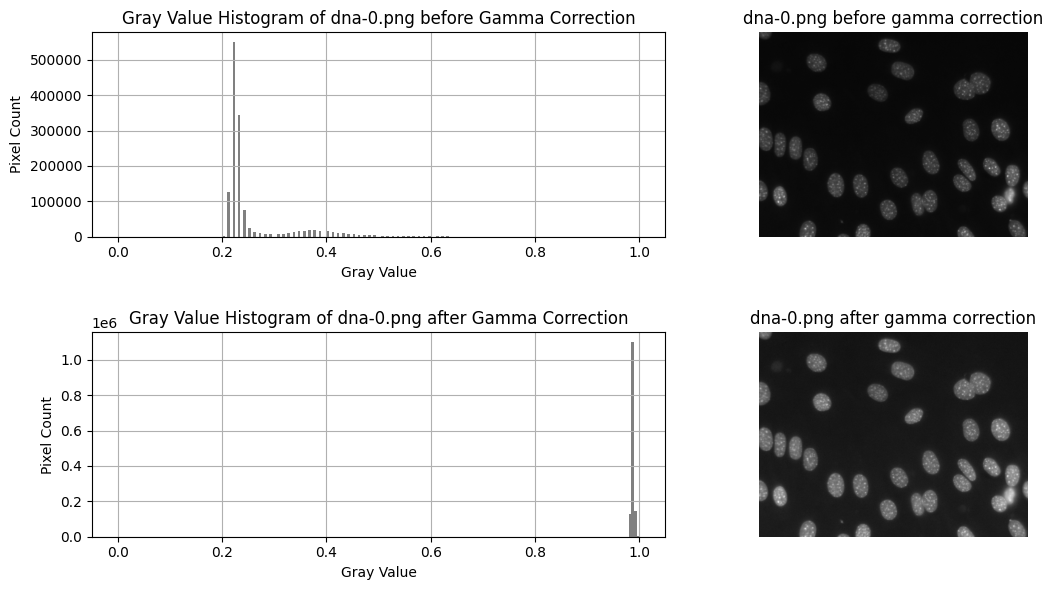

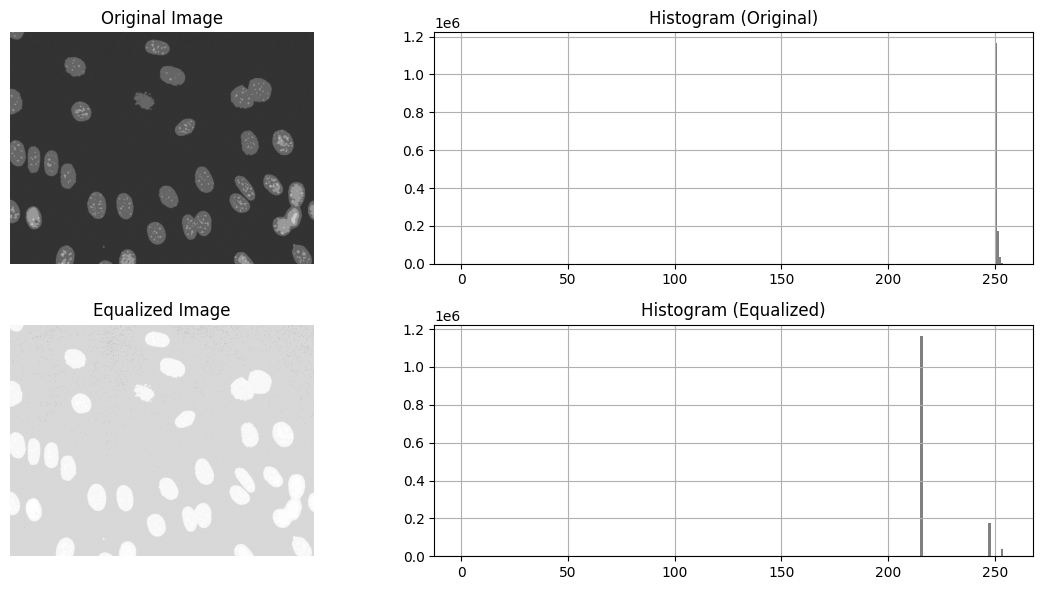

NameError: name 'threshold_otsu' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# reads image and scales to 0-1 
image = "dna-0.png"
img = imread(image)

min = np.min(img)
max = np.max(img)

img_scaled = (img/max)


# Gamma transformation
def gammatransformation(image):
   """
    Every pixel value p is transformed by p^gamma.

    Parameters
    ----------
    parameter1 : gray level image
        A 2D array containing all the gray levels of each pixel.

    Returns 
    -------
    new image as 2D array.
       Each pixel value of the transformed image is result of p^gamma.
       Result is in the range 0-1
    """
   
   if max(image) != 1:
      image = image/max(image)  
  
   if np.mean(image) >= 0.5:
     gamma = 10
   else:
     gamma = 0.01

   img_gamma = np.power(image, gamma)

   return img_gamma

img_gamma = gammatransformation(img_scaled)

# plots
plt.figure(figsize=(12,6))

plt.subplot(2, 2, 1)
plt.hist(img_scaled.flatten(), bins=200, range=(0, 1), color='gray')
plt.title(f'Gray Value Histogram of {image} before Gamma Correction')
plt.xlabel('Gray Value')
plt.ylabel('Pixel Count')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.imshow(img_scaled, cmap='gray')  
plt.title(f'{image} before gamma correction')
plt.axis('off') 

plt.subplot(2, 2, 3)
plt.hist(img_gamma.flatten(), bins=200, range=(0, 1), color='gray')
plt.title(f'Gray Value Histogram of {image} after Gamma Correction')
plt.xlabel('Gray Value')
plt.ylabel('Pixel Count')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.imshow(img_gamma, cmap='gray')  
plt.title(f'{image} after gamma correction')
plt.axis('off')

plt.tight_layout()
plt.show()



# Histogram equalization

def histogramequalization(image):
   """
    Spreads the intensity values to the full range of 0-255.

    Parameters
    ----------
    parameter1 : gray level image
        A 2D array containing all the gray levels of each pixel.

    Returns 
    -------
    new image as 2D array.
       New image uses the full range of 0-255
    """
   if max(image) == 255:
      image_8bit = (image).astype(np.uint8)
   else:
      image_8bit = (image/max(image) * 255).astype(np.uint8)

   hist, bins = np.histogram(image_8bit.flatten(), bins=256, range=[0, 256])
  
   cdf = hist.cumsum()
  
   cdf_normalized = cdf * 255 / cdf[-1] 

   image_eq = cdf_normalized[image_8bit]

   image_eq = image_eq.astype(np.uint8)

   return image_eq

img_gamma_eq = histogramequalization(img_gamma)


# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(img_gamma_8bit, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Histogram (Original)")
plt.hist(img_gamma_8bit.flatten(), bins=256, range=(0, 255), color='gray')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.title("Equalized Image")
plt.imshow(img_gamma_eq, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Histogram (Equalized)")
plt.hist(img_gamma_eq.flatten(), bins=256, range=(0, 255), color='gray')
plt.grid(True)

plt.tight_layout()
plt.show()


# Otsu thresholding
T = threshold_otsu(img_gamma_eq)

binary = (img_gamma_eq > T).astype(np.uint8)

binary_vs = binary * 255

print(T)

plt.imshow(binary_vs, cmap='gray')  
plt.title(f'{image} after thresholding')
plt.axis('off')
plt.show()

T = threshold_otsu(img)

binary_img = (img > T).astype(np.uint8)

binary_img_vs = binary_img * 255

plt.imshow(binary_img_vs, cmap='gray')  
plt.title(f'{image} after thresholding')
plt.axis('off')
plt.show()


# dice score
otsu_img = (binary_vs > 0).astype(int).flatten()  # output of otsu


ground_truth = imread('0.png')
otsu_gt = (ground_truth > 0).astype(int).flatten()  # gt binary & 1D


def dice_score(otsu_img, otsu_gt):

    # control if the Pictures have the same Size
    if len(otsu_img) != len(otsu_gt):
       if len(otsu_img) > len(otsu_gt):
         otsu_img = otsu_img[1:len(otsu_gt)]
       else:
        otsu_gt = otsu_gt[1:len(otsu_img)]


    # defining the variables for the Dice Score equation
    positive_overlap = 0
    sum_img = 0
    sum_gt = 0

    for t, p in zip(otsu_img, otsu_gt):
        if t == 1:
            sum_img += 1
        if p == 1:
            sum_gt += 1
        if t == 1 and p == 1:
            positive_overlap += 1

    if sum_img + sum_gt == 0:
        return 1.0

    return 2 * positive_overlap / (sum_img + sum_gt)

print("Dice Score:", dice_score(otsu_img, otsu_gt))

